In [1]:
import numpy as np
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Define the ODE model for tumor growth
def ode_model(y, t, k):
    dydt = k * y
    return dydt

# Set a seed for reproducibility
np.random.seed(42)

# Define number of patients
n_patients = 1000

# Sample parameters (tumor growth rates) and initial tumor sizes
growth_rates = np.random.normal(0.1, 0.02, n_patients)
initial_sizes = np.random.normal(1, 0.2, n_patients)

# Time points
t = np.linspace(0, 10, 11)

# Initialize arrays to store tumor sizes and responses
tumor_sizes = np.zeros((n_patients, len(t)))
tumor_responses = np.zeros(n_patients)

# Simulate ODE for each patient
for i in range(n_patients):
    y = odeint(ode_model, initial_sizes[i], t, args=(growth_rates[i],))
    tumor_sizes[i, :] = y.ravel()
    tumor_responses[i] = (y[-1] - y[0]) / y[0]

# Prepare the data for the machine learning model
X = tumor_sizes
y = tumor_responses

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the coefficient of determination (R^2) of the prediction
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


R^2 score: 0.9236149430564982


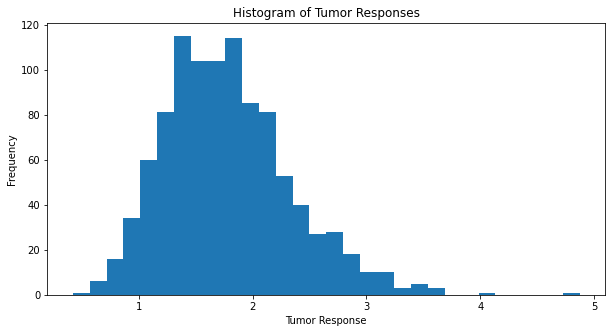

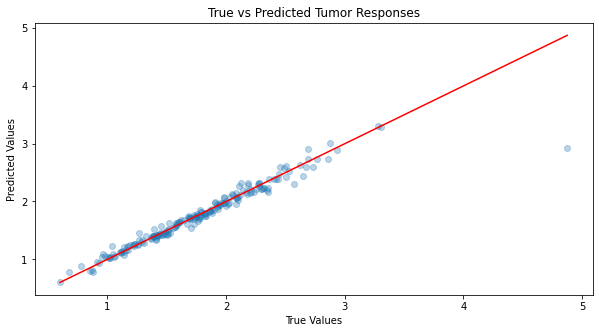

In [2]:
import matplotlib.pyplot as plt

# Plot a histogram of the tumor responses
plt.figure(figsize=(10, 5))
plt.hist(y, bins=30)
plt.title('Histogram of Tumor Responses')
plt.xlabel('Tumor Response')
plt.ylabel('Frequency')
plt.show()

# Plot true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')  # parity line
plt.title('True vs Predicted Tumor Responses')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()
